In [1]:
import BenchmarkTools: @btime, @benchmark;
import Optim: Options, NelderMead

import Pkg: activate, build
activate("../GSHEIntegrator/.")

import GSHEIntegrator;


import Plots;

using LaTeXStrings
using Measures

import DoubleFloats: Double64

import FileIO

  Activating project at `~/Projects/birefringence/GSHEIntegrator`
┌ Info: Precompiling GSHEIntegrator [95376d2f-314f-47c4-97a6-da6eee6a3a26]
└ @ Base loading.jl:1423


# Setup things

In [5]:
options = Options(iterations=1000, g_abstol=1e-14, g_reltol=1e-14,
                  outer_g_abstol=1e-14, outer_g_reltol=1e-14);
alg = NelderMead()
ϵs = (10).^LinRange(-3, -1, 30)

Nsols = 2
rsource = [4.0]
θsource = acos.(LinRange(-0.9, 0.9, 12))
#θsource = [0.5π]

θobs = [0.25π]
ϕobs = [1π]
as = [0.8]


base_geos = GSHEIntegrator.setup_geometries(;
   rsource=rsource, θsource=θsource, ϕsource=[0.0],
   robs=[50.0], θobs=θobs, ϕobs=ϕobs, as=as);

In [7]:
Xgeos = GSHEIntegrator.solve_geodesics_from_geometries(base_geos, alg, options);

Solving geodesics for geometry 1/12
Solving geodesics for geometry 9/12
Solving geodesics for geometry 5/12
Solving geodesics for geometry 11/12
Solving geodesics for geometry 3/12
Solving geodesics for geometry 7/12
Solving geodesics for geometry 8/12
Solving geodesics for geometry 6/12
Solving geodesics for geometry 12/12
Solving geodesics for geometry 4/12
Solving geodesics for geometry 2/12
Solving geodesics for geometry 10/12


In [8]:
Xspinhalls = GSHEIntegrator.solve_perturbed_config(Xgeos, base_geos, ϵs, alg, options);

Solving perturbations for geometry 1/12
Solving perturbations for geometry 3/12
Solving perturbations for geometry 5/12
Solving perturbations for geometry 11/12
Solving perturbations for geometry 1/12
Solving perturbations for geometry 3/12
Solving perturbations for geometry 5/12
Solving perturbations for geometry 11/12
Solving perturbations for geometry 9/12
Solving perturbations for geometry 7/12
Solving perturbations for geometry 2/12
Solving perturbations for geometry 4/12
Solving perturbations for geometry 6/12
Solving perturbations for geometry 12/12
Solving perturbations for geometry 8/12
Solving perturbations for geometry 10/12


┌ Info: Detected 1 outlier. Recalculating.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/setup.jl:327
┌ Info: Detected 1 outlier. Recalculating.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/setup.jl:327
┌ Info: Detected 1 outlier. Recalculating.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/setup.jl:327
┌ Info: Detected 1 outlier. Recalculating.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/setup.jl:327
┌ Info: Detected 1 outlier. Recalculating.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/setup.jl:327
┌ Info: Detected 1 outlier. Recalculating.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/setup.jl:327
┌ Info: Detected 1 outlier. Recalculating.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/setup.jl:327
┌ Info: Detected 1 outlier. Recalculating.
└ @ GSHEIntegrator /Users/richard

In [33]:
Xgeos[1][1, 3]

66.36089475501467

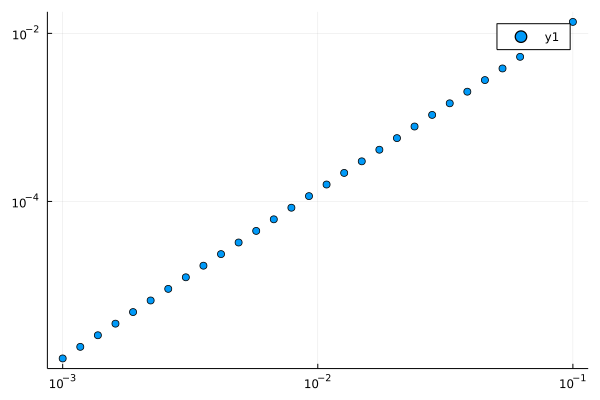

In [36]:

t = Xspinhalls[1][:, 2, 1, 3]
t2 = Xspinhalls[1][:, 2, 1, 3]

Plots.scatter(ϵs, abs.(t .- Xgeos[1][1, 3]), xscale=:log10, yscale=:log10)
# Plots.scatter(ϵs, t2)


In [6]:
alphas = zeros(length(base_geos), 2)

for i in 1:length(base_geos), j in 1:2
    pars = GSHEIntegrator.fit_Δts(ϵs, Xspinhalls[i])
    alphas[i, :] .= pars[:, 2, 1]
    println("$i $j", pars[j, 1, :])
end

1 1[3.001100274976178, 0.0002944582870587204]
1 2[3.0005510075218833, 0.00019788343145828556]
2 1[3.0016329362445298, 0.0004308957721163207]
2 2[3.00246212802058, 0.0006917097183280492]
3 1[3.0009103140726214, 0.000230700213488945]
3 2[3.003492787520435, 0.0008976122862599414]
4 1[3.0004125710008145, 0.00010466368998599413]
4 2[3.0030929911965645, 0.0008729833239767895]
5 1[3.0003271438855066, 8.678716674479185e-5]
5 2[3.002785787762566, 0.0010849744643601344]
6 1[2.999996929366712, 0.00017874858847903325]
6 2[3.002799313562104, 0.0009454424357706394]
7 1[3.000125116265006, 4.505447939230351e-5]
7 2[3.0016654224555164, 0.0005929917284913228]
8 1[3.00003889665339, 6.207955744963745e-5]
8 2[3.001498109479745, 0.00052155079150896]
9 1[2.9999010708411897, 0.00027974696568201844]
9 2[3.002385756506719, 0.0004948687066599185]
10 1[2.9996685361208715, 0.000590166844668296]
10 2[3.000355657543334, 0.00013441290519201123]
11 1[3.000406942050941, 0.0006755911773714416]
11 2[3.0002869927306555, 9

┌ Info: 1 element(s) x=[0.1] y=[NaN] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/powerlaw.jl:84
┌ Info: 1 element(s) x=[0.1] y=[NaN] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/powerlaw.jl:84
┌ Info: 1 element(s) x=[0.1] y=[NaN] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/powerlaw.jl:84
┌ Info: 1 element(s) x=[0.1] y=[NaN] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/powerlaw.jl:84


In [8]:
fig = Plots.plot(ylabel=L"\alpha", xlabel=L"a", dpi=300, xscale=:log, yscale=:log)

Plots.scatter!(fig, as , alphas[:, 1], label=nothing)

Plots.scatter!(fig, as, alphas[:, 2], label=nothing)
# Plots.savefig(fig, "~/Downloads/plot.png")

display(fig)

In [63]:
import NPZ

In [65]:
NPZ.npzwrite("x.npy", Xgeos[1])

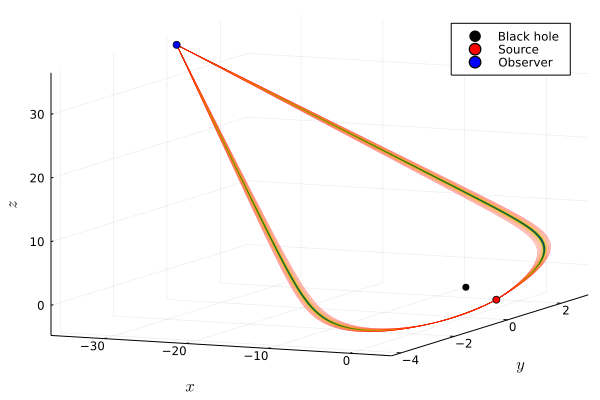

In [52]:
i = 4

fig = Plots.plot(dpi=300, xlabel=L"x", ylabel=L"y", zlabel=L"z")
GSHEIntegrator.plot_geodesics!(fig, Xgeos[i], base_geos[i])
GSHEIntegrator.plot_spinhall_trajectories!(fig, Xspinhalls[i], ϵs, base_geos[i])
GSHEIntegrator.plot_blackhole!(fig, (0.0, 0.0, 0.0), 0.0)
GSHEIntegrator.plot_start_end!(fig, base_geos[i])
Plots.savefig(fig, "/Users/richard/Downloads/trajectories.pdf")
display(fig)

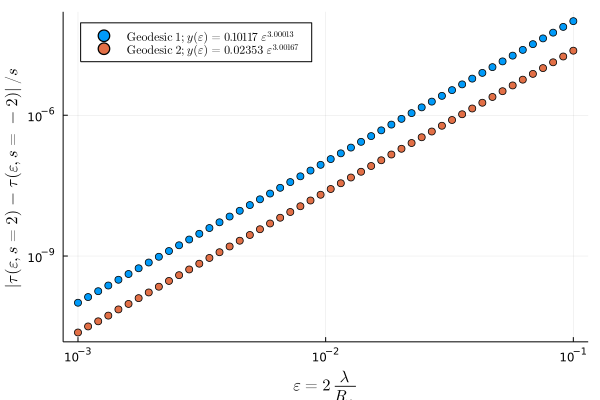

In [213]:
# f = Plots.plot(dpi=450, xlabel=L"\epsilon = 2 \frac{\lambda}{R_s}",
#                ylabel=L"|\tau(\epsilon) - \tau(\mathrm{geodesic})| / s",
#                xaxis=:log, yscale=:log, legend=:topleft, bottom_margin=4mm, left_margin=3mm)

# for i in 1:2
#     GWBirefringence.plot_arrival_times!(f, ϵs, Xspinhalls[end], Xgeos[end], i)
# end

# display(f)
# Plots.savefig(f, "~/Downloads/arrival.png")



f = Plots.plot(dpi=450, xlabel=L"\epsilon = 2 \frac{\lambda}{R_s}", ylabel=L"|\tau(\epsilon, s=2) - \tau(\epsilon, s=-2)| / s",
               xaxis=:log, yaxis=:log, legend=:topleft, bottom_margin=4mm, left_margin=3mm)
GWBirefringence.plot_time_difference!(f, ϵs, Xspinhalls[end], Xgeos[end])
display(f)

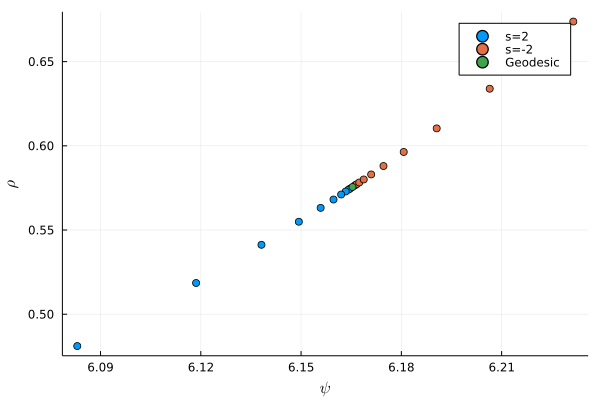

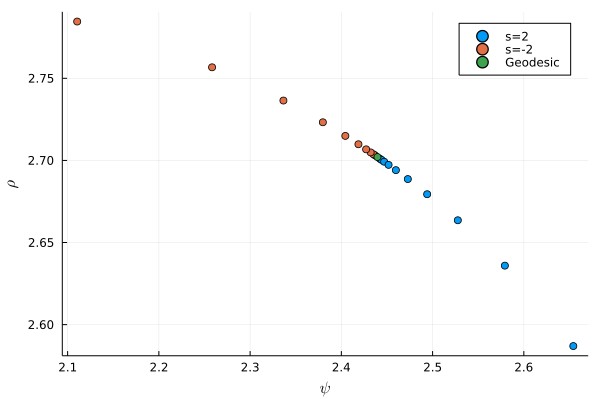

In [83]:
for i in 1:size(Xgeo)[1] 
    f = Plots.plot(dpi=600, xlabel=L"\psi", ylabel=L"\rho")
    GWBirefringence.plot_initial_conditions!(f, Xspinhalls[1], Xgeos[1], i)
    display(f)
end


# f = Plots.plot(f1, f2, layout=(1, 2), legend=false, size=(900, 300), dpi=600,
#                bottom_margin=5mm, left_margin=5mm)
# display(f)
# Plots.savefig(f, "/Users/richard/Downloads/initial_conditions.png")

In [ ]:
colors = ["red", "orange", "purple", "black"]

fig = GLMakie.Figure()
axs = [GLMakie.Axis(fig[1, i]; aspect=GLMakie.DataAspect(),
       xlabel="Azimuthal direction", ylabel="Polar direction",
       title="Angular distance to the observer") for i = 1:1]
hm = GLMakie.heatmap!(axs[1], grid[:, 2], grid[:, 1], log10.(Z))
GLMakie.Colorbar(fig[1, 2], hm, label="Log angular distance")
GLMakie.scatter!(axs[1], Xplus[:, 2], Xplus[:, 1], color="red", label="+")
# GLMakie.scatter!(axs[1], Xminus[:, 3], Xminus[:, 2], color="violet", label="-")
# GLMakie.scatter!(axs[1], X0[:, 3], X0[:, 2], color="black", label="-")


# GLMakie.save("/Users/richard/Downloads/ring2.png", fig, resolution=(640, 640), px_per_unit=5.0)

fig